***01. Import Necessary Libraries:***

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

***02. Define a Decision Tree Class:***

In [3]:
class DecisionTree:
    def __init__(self, max_depth=3):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = DecisionTreeRegressor(max_depth=self.max_depth)
        self.tree.fit(X, y)

    def predict(self, X):
        return self.tree.predict(X)

***03. Implement Gradient Boosting Function:***

In [4]:
def gradient_boosting(X, y, n_estimators=100, learning_rate=0.1, max_depth=3):
    trees = []
    y_pred = np.zeros(len(y))

    for i in range(n_estimators):
        tree = DecisionTree(max_depth=max_depth)
        residuals = y - y_pred #Error residuals
        tree.fit(X, residuals)
        trees.append(tree)

        update = learning_rate * tree.predict(X)    
        y_pred += update

    return trees, y_pred

***04. Make Predictions:***

In [5]:
def predict(X, trees):
    y_pred = np.zeros(len(X))
    for tree in trees:
        y_pred += tree.predict(X)
    return y_pred

***05. Example Usage:***

R2 score: 0.7990391991430585


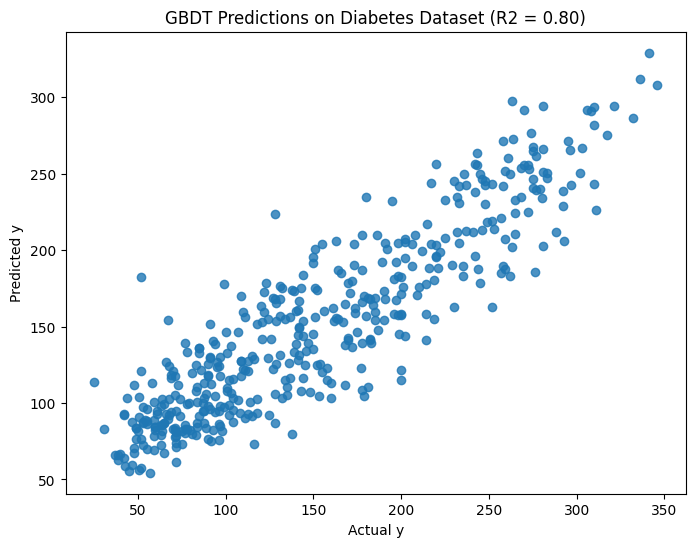

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score

# Load the diabetes dataset
X, y = load_diabetes(return_X_y=True)

# Train the GBDT model
trees, y_pred = gradient_boosting(X, y)

# Calculate R2 score
r2 = r2_score(y, y_pred)
print("R2 score:", r2)

# Plot predicted vs. actual y
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.8)
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("GBDT Predictions on Diabetes Dataset (R2 = {:.2f})".format(r2))
plt.show()

R2 score: 0.7990391991430585


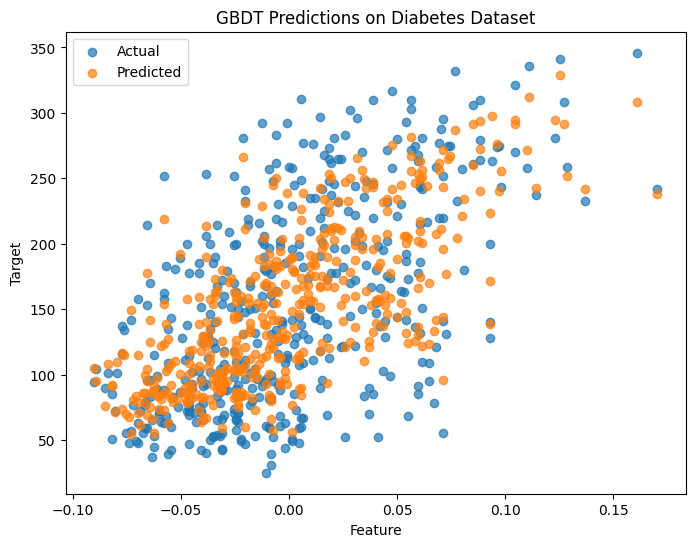

In [12]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the diabetes dataset
X, y = load_diabetes(return_X_y=True)

# Train the GBDT model
trees, y_pred = gradient_boosting(X, y)

# Calculate R2 score
r2 = r2_score(y, y_pred)
print("R2 score:", r2)

# Plot the predictions and actual values
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 2], y, label="Actual", alpha=0.7)  # Use a specific feature for visualization
plt.scatter(X[:, 2], y_pred, label="Predicted", alpha=0.7)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("GBDT Predictions on Diabetes Dataset")
plt.legend()
plt.show()

**Gradient Boost Decission Trees**

*Perfomin GridSearch to find the best parameters for Breast Cancer Dataset*

In [14]:
import pandas as pd
from sklearn.datasets import load_breast_cancer  # Example dataset
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)  # Load the example dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split into train/test sets

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
} # Define the hyperparameter grid

# Perform grid search with 5-fold cross-validation
gbdt = GradientBoostingClassifier()
grid_search = GridSearchCV(gbdt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

#retrive the best parameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

#Train the model with the best parameters
best_gbdt = GradientBoostingClassifier(**best_params)
best_gbdt.fit(X_train, y_train)

#evaluate the model
y_pred = best_gbdt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Accuracy: 0.956140350877193


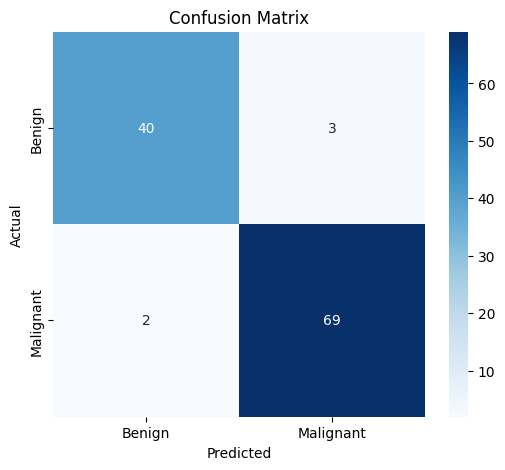

In [17]:
import seaborn as sns

#plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Benign', 'Malignant'], columns=['Benign', 'Malignant'])
plt.figure(figsize=(6, 5))
plt.title("Confusion Matrix")
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
